<a href="https://colab.research.google.com/github/tarunmer77/assignment-NeuralNetwork/blob/main/GasTurbines_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [34]:
import pandas as pd
import numpy 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.metrics import mean_squared_error


In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [37]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [38]:
data.shape

(15039, 11)

In [39]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [40]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [41]:
# As we have to predict turbine energy yield (TEY) using ambient variables as features. So, here we need input variables which are ambient and out Energy yield

In [42]:
# Input
# Ambient Temp, Pressure, Humidity

In [43]:
# Output
# Turbine energy yeild

In [44]:
x = data[['AT','AP','AH']]
y = data['TEY']

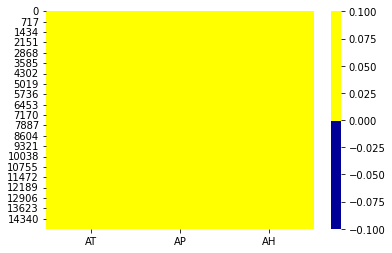

In [45]:
import seaborn as sns
cols = x.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(x[cols].isnull(),
            cmap=sns.color_palette(colours))

In [46]:
import seaborn as sns

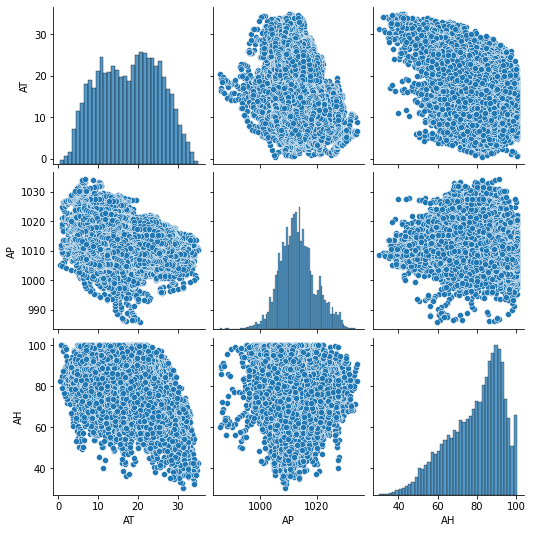

In [47]:
sns.pairplot(x,)

In [48]:
# Standardizing the data

In [49]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.4397781 , -0.82664395,  1.28143632],
       [-1.44960109, -0.74864748,  1.30456402],
       [-1.43472138, -0.68625031,  1.21908576],
       ...,
       [-1.38626659, -1.07623263,  1.47697056],
       [-1.42042259, -0.99823616,  1.44159024],
       [-1.43073409, -0.93583899,  1.33465179]])

In [50]:
# Test Train Split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=15)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12031, 3), (3008, 3), (12031,), (3008,))

In [52]:
# Model Building

In [53]:
model = Sequential()
model.add(Dense(3,input_dim=3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [54]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
# Model Training

In [56]:
# fit the model
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
376/376 [==============================] - 1s 2ms/step - loss: -386.4627 - accuracy: 0.0000e+00
Epoch 2/20
376/376 [==============================] - 1s 2ms/step - loss: -1816.8119 - accuracy: 0.0000e+00
Epoch 3/20
376/376 [==============================] - 1s 2ms/step - loss: -5289.2295 - accuracy: 0.0000e+00
Epoch 4/20
376/376 [==============================] - 1s 2ms/step - loss: -11672.8066 - accuracy: 0.0000e+00
Epoch 5/20
376/376 [==============================] - 1s 2ms/step - loss: -21553.9766 - accuracy: 0.0000e+00
Epoch 6/20
376/376 [==============================] - 1s 2ms/step - loss: -35344.6836 - accuracy: 0.0000e+00
Epoch 7/20
376/376 [==============================] - 1s 2ms/step - loss: -53340.2266 - accuracy: 0.0000e+00
Epoch 8/20
376/376 [==============================] - 1s 2ms/step - loss: -75778.9297 - accuracy: 0.0000e+00
Epoch 9/20
376/376 [==============================] - 1s 2ms/step - loss: -102825.6328 - accuracy: 0.0000e+00
Epoch 10/20
376/376 [=

In [57]:
# Model Testing

In [58]:
y_pred_train = model.predict(X_train)

In [59]:
y_pred_test = model.predict(X_test)

In [60]:
# Model Evaluation

In [61]:
print(mean_squared_error(y_train,y_pred_train,squared=False))

133.97425852116916


In [62]:
print(mean_squared_error(y_test,y_pred_test,squared=False))

134.73021135758717
